In [2]:
from gym_puyopuyo import register
from gym import make

register()

## Exemple de partie

In [5]:
env = make("PuyoPuyoEndlessSmall-v2")

for i in range(50):
    _, r, done, info = env.step(env.action_space.sample())
    print(r)
    env.render(mode='human')
    if done:
        print(done)
        break
env.close()

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
-1
True


In [6]:
from gym_puyopuyo.agent import FlatMCTreeAgent, SmallTreeSearchAgent, WideTreeSearchAgent, TsuTreeSearchAgent, NMCSAgent, NRPAAgent,GNRPAAgent
from gym import make

env = make("PuyoPuyoEndlessSmall-v2")#SMALL GRID
#env = make("PuyoPuyoEndlessTsu-v2")#BIG GRID

env.reset()
state = env.get_root()


#AGENT
#agent = NRPAAgent(4, 2, 0.8,250,PolicyType=0,zeta=0)
#agent = GNRPAAgent(4, 1, gamma=0.8,n=100,PolicyType=1,tau=1)
agent = NMCSAgent(3, 2, 2, 1, 0.8)#TALL
#agent = NRPAAgent(3, 2, 0.8,250,PolicyType=1,zeta=0)

for i in range(200):
    action = agent.get_action(state)
    #print(action)
    _, r, done, info = env.step(action)
    #print(r)
    state = info["state"]
    env.render(mode='human')
    if done:
        print("done")
        break
env.close()

done


## Evaluation

### Results for the small and the big grid

SMALL mean return: 
* Random : 0.02149
* Flat : 0.61763
* NCMS : 0.74859

TALL mean return :
* Random : 6.09675
* Flat : 87.7125
* NCMS : 1221.25225

In [9]:
from gym_puyopuyo.agent import FlatMCTreeAgent, SmallTreeSearchAgent, WideTreeSearchAgent, TsuTreeSearchAgent, NMCSAgent, NRPAAgent,GNRPAAgent
from gym_puyopuyo import register
from gym import make

env = make("PuyoPuyoEndlessTsu-v2")

env.reset()
state = env.get_root()


#agent = FlatMCTreeAgent(3, 100, 0.80)
#agent = FlatMCTreeAgent(4, 200, 0.80)
#agent = GNRPAAgent(4, 1, gamma=0.8,n=100,PolicyType=1,tau=1)

#agent = NMCSAgent(4, 10, 2, 0, 0.70)
#agent = NMCSAgent(4, 10, 1, 0, 1)#TALL

#agent = TsuTreeSearchAgent()
#agent = NRPAAgent(3, 1, 0.8,100,PolicyType=0,zeta=1)
agent = GNRPAAgent(4, 1, 0.8,200,PolicyType=1,tau=1)
#agent = NRPAAgent(4, 2, 0.8,250,PolicyType=1,zeta=0)

rewards = []
chain = []
for _ in range(5):
    yolo = []
    env.reset()
    state = env.get_root()
    for i in range(200):
        action = agent.get_action(state)
        #print(action)
        _, r, done, info = env.step(action)
        #print(r)
        state = info["state"]
        #rewards.append(r)
        if done:
            print("done")
            break
        yolo.append(r[0])
        chain.append(r[1])
    rewards.append(yolo)
env.close()

## Results

In [10]:
score = 0
for r in rewards:
    score = sum(r)/200
    print(score)
score/len(rewards)

171.05
196.9
156.05
278.05
294.9


58.98

## Graphe de la récompense cummulé par itteration

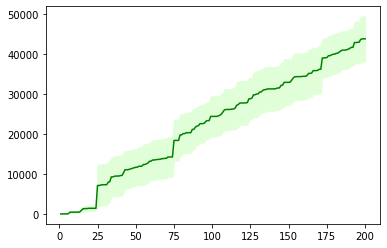

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import copy

fig, ax = plt.subplots()
yolo = copy.deepcopy(rewards)
for k in range(len(rewards)):
    yolo[k] = np.array(rewards[k]).cumsum()
    
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

y, error = tolerant_mean(yolo)
ax.plot(np.arange(len(y))+1, y, color='green')
ax.fill_between(np.arange(len(y))+1, y-error/2, y+error/2, color='#e0ffd8')
plt.show()

## Répartition des tailles de chaines

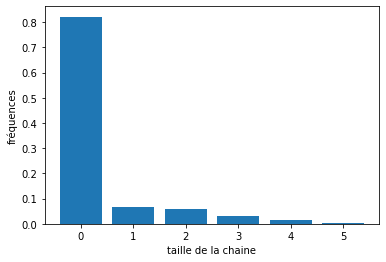

In [12]:
labels, counts = np.unique(chain, return_counts=True)

plt.bar(labels[:6], counts[:6]/counts[:6].sum(), align='center')

plt.xlabel('taille de la chaine')
plt.ylabel('fréquences')
plt.show()

In [92]:
env.close()